In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [2]:
# 1. Set Paths
train_dir = "C:/Users/parth/Desktop/Bone classification/data/train"
val_dir = "C:/Users/parth/Desktop/Bone classification/data/val"
img_size = (224, 224)
batch_size = 32

In [3]:

# 2. Load Data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    color_mode="grayscale",
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    color_mode="grayscale",
    batch_size=batch_size
)

Found 8863 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


In [4]:
# 3. Class names
class_names = train_ds.class_names
print("Classes:", class_names)


Classes: ['fractured', 'not fractured']


In [5]:
# 4. Normalize (rescale pixels to 0-1)
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


In [6]:
# 5. Prefetch (performance boost)
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [8]:

# 6. Build CNN Model
model = models.Sequential([
    layers.Input(shape=(224, 224, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,168,513 (42.60 MB)

 Trainable params: 11,168,513 (42.60 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 7. Compile Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [10]:
# 8. Train Model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - accuracy: 0.6879 - loss: 0.5779 - val_accuracy: 0.6917 - val_loss: 0.8598
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1089s 4s/step - accuracy: 0.9318 - loss: 0.1791 - val_accuracy: 0.7300 - val_loss: 0.9038
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1071s 4s/step - accuracy: 0.9782 - loss: 0.0592 - val_accuracy: 0.7633 - val_loss: 0.9232
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1020s 4s/step - accuracy: 0.9900 - loss: 0.0282 - val_accuracy: 0.7750 - val_loss: 0.9099
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 368s 1s/step - accuracy: 0.9914 - loss: 0.0229 - val_accuracy: 0.6317 - val_loss: 1.6754
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.9926 - loss: 0.0200 - val_accuracy: 0.7383 - val_loss: 1.3091
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.7283 - val_loss: 1.8331
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.9964 - loss: 0.0143 - val_a

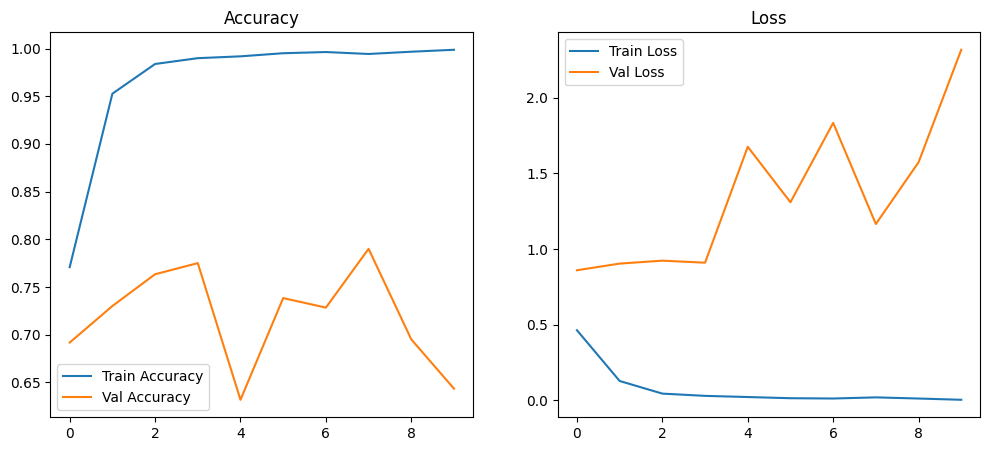

In [11]:
# 9. Plot Accuracy & Loss
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Train Accuracy')
    plt.plot(val_acc, label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.legend()
    plt.title('Loss')

    plt.show()

plot_history(history)


In [12]:
# 10. Evaluate
loss, acc = model.evaluate(val_ds)
print(f"\nValidation Accuracy: {acc*100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.6778 - loss: 2.0294

Validation Accuracy: 64.33%


In [13]:
# 11. Save Model
model.save("bone_fracture_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


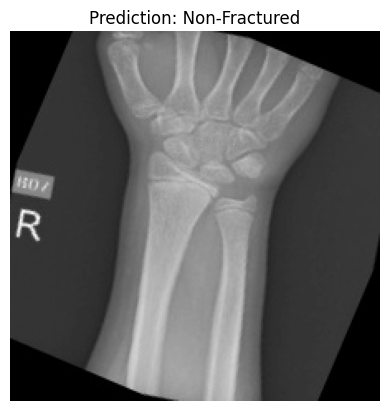

Predicted Class: Non-Fractured (Confidence: 0.9853)


In [15]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk
from PIL import Image

# Load your trained model
model = load_model("bone_fracture_model.h5")  # Replace with your model filename if different

# Class names
class_names = ['Fractured', 'Non-Fractured']

def predict_uploaded_image():
    # Open file dialog to select image
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    root.destroy()

    if file_path:
        # Load and preprocess the image
        img = image.load_img(file_path, target_size=(224, 224), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

        # Predict
        prediction = model.predict(img_array)[0][0]
        predicted_class = class_names[int(prediction > 0.5)]

        # Show image and prediction
        plt.imshow(np.squeeze(img_array), cmap='gray')
        plt.title(f"Prediction: {predicted_class}")
        plt.axis("off")
        plt.show()

        print(f"Predicted Class: {predicted_class} (Confidence: {prediction:.4f})")
    else:
        print("No image selected.")

# Run manual testing
predict_uploaded_image()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


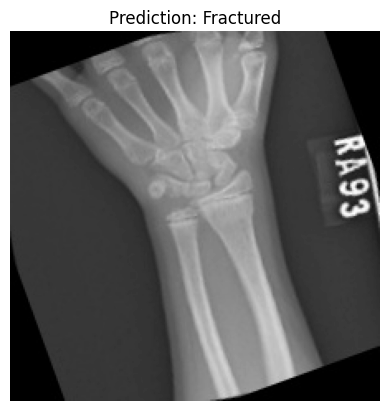

Predicted Class: Fractured (Confidence: 0.0006)


In [16]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk
from PIL import Image

# Load your trained model
model = load_model("bone_fracture_model.h5")  # Replace with your model filename if different

# Class names
class_names = ['Fractured', 'Non-Fractured']

def predict_uploaded_image():
    # Open file dialog to select image
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    root.destroy()

    if file_path:
        # Load and preprocess the image
        img = image.load_img(file_path, target_size=(224, 224), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

        # Predict
        prediction = model.predict(img_array)[0][0]
        predicted_class = class_names[int(prediction > 0.5)]

        # Show image and prediction
        plt.imshow(np.squeeze(img_array), cmap='gray')
        plt.title(f"Prediction: {predicted_class}")
        plt.axis("off")
        plt.show()

        print(f"Predicted Class: {predicted_class} (Confidence: {prediction:.4f})")
    else:
        print("No image selected.")

# Run manual testing
predict_uploaded_image()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


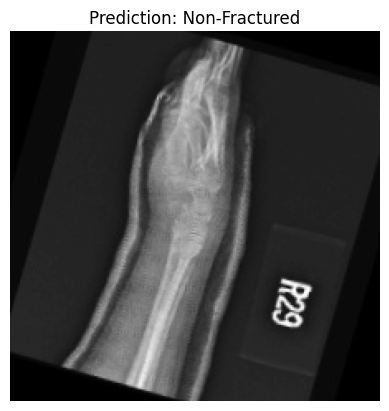

Predicted Class: Non-Fractured (Confidence: 1.0000)


In [17]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk
from PIL import Image

# Load your trained model
model = load_model("bone_fracture_model.h5")  # Replace with your model filename if different

# Class names
class_names = ['Fractured', 'Non-Fractured']

def predict_uploaded_image():
    # Open file dialog to select image
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    root.destroy()

    if file_path:
        # Load and preprocess the image
        img = image.load_img(file_path, target_size=(224, 224), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

        # Predict
        prediction = model.predict(img_array)[0][0]
        predicted_class = class_names[int(prediction > 0.5)]

        # Show image and prediction
        plt.imshow(np.squeeze(img_array), cmap='gray')
        plt.title(f"Prediction: {predicted_class}")
        plt.axis("off")
        plt.show()

        print(f"Predicted Class: {predicted_class} (Confidence: {prediction:.4f})")
    else:
        print("No image selected.")

# Run manual testing
predict_uploaded_image()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


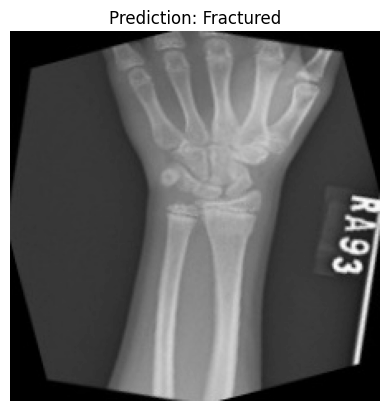

Predicted Class: Fractured (Confidence: 0.0000)


In [18]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk
from PIL import Image

# Load your trained model
model = load_model("bone_fracture_model.h5")  # Replace with your model filename if different

# Class names
class_names = ['Fractured', 'Non-Fractured']

def predict_uploaded_image():
    # Open file dialog to select image
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    root.destroy()

    if file_path:
        # Load and preprocess the image
        img = image.load_img(file_path, target_size=(224, 224), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

        # Predict
        prediction = model.predict(img_array)[0][0]
        predicted_class = class_names[int(prediction > 0.5)]

        # Show image and prediction
        plt.imshow(np.squeeze(img_array), cmap='gray')
        plt.title(f"Prediction: {predicted_class}")
        plt.axis("off")
        plt.show()

        print(f"Predicted Class: {predicted_class} (Confidence: {prediction:.4f})")
    else:
        print("No image selected.")

# Run manual testing
predict_uploaded_image()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


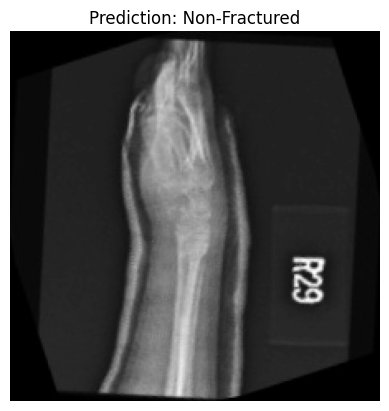

Predicted Class: Non-Fractured (Confidence: 1.0000)


In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk
from PIL import Image

# Load your trained model
model = load_model("bone_fracture_model.h5")  # Replace with your model filename if different

# Class names
class_names = ['Fractured', 'Non-Fractured']

def predict_uploaded_image():
    # Open file dialog to select image
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    root.destroy()

    if file_path:
        # Load and preprocess the image
        img = image.load_img(file_path, target_size=(224, 224), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

        # Predict
        prediction = model.predict(img_array)[0][0]
        predicted_class = class_names[int(prediction > 0.5)]

        # Show image and prediction
        plt.imshow(np.squeeze(img_array), cmap='gray')
        plt.title(f"Prediction: {predicted_class}")
        plt.axis("off")
        plt.show()

        print(f"Predicted Class: {predicted_class} (Confidence: {prediction:.4f})")
    else:
        print("No image selected.")

# Run manual testing
predict_uploaded_image()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


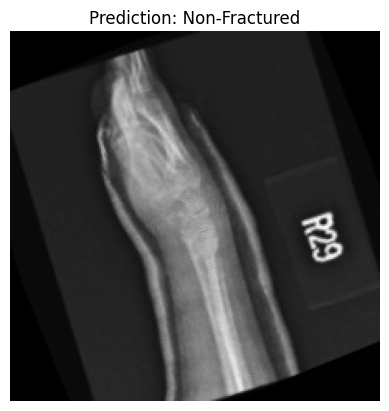

Predicted Class: Non-Fractured (Confidence: 1.0000)


In [20]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk
from PIL import Image

# Load your trained model
model = load_model("bone_fracture_model.h5")  # Replace with your model filename if different

# Class names
class_names = ['Fractured', 'Non-Fractured']

def predict_uploaded_image():
    # Open file dialog to select image
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    root.destroy()

    if file_path:
        # Load and preprocess the image
        img = image.load_img(file_path, target_size=(224, 224), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

        # Predict
        prediction = model.predict(img_array)[0][0]
        predicted_class = class_names[int(prediction > 0.5)]

        # Show image and prediction
        plt.imshow(np.squeeze(img_array), cmap='gray')
        plt.title(f"Prediction: {predicted_class}")
        plt.axis("off")
        plt.show()

        print(f"Predicted Class: {predicted_class} (Confidence: {prediction:.4f})")
    else:
        print("No image selected.")

# Run manual testing
predict_uploaded_image()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


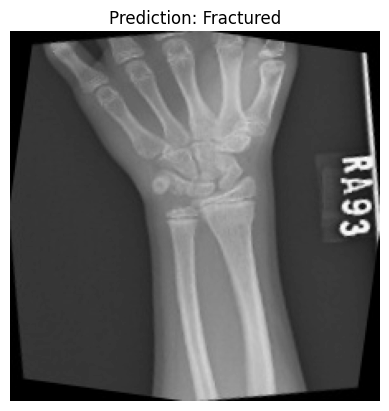

Predicted Class: Fractured (Confidence: 0.0000)


In [21]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk
from PIL import Image

# Load your trained model
model = load_model("bone_fracture_model.h5")  # Replace with your model filename if different

# Class names
class_names = ['Fractured', 'Non-Fractured']

def predict_uploaded_image():
    # Open file dialog to select image
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    root.destroy()

    if file_path:
        # Load and preprocess the image
        img = image.load_img(file_path, target_size=(224, 224), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

        # Predict
        prediction = model.predict(img_array)[0][0]
        predicted_class = class_names[int(prediction > 0.5)]

        # Show image and prediction
        plt.imshow(np.squeeze(img_array), cmap='gray')
        plt.title(f"Prediction: {predicted_class}")
        plt.axis("off")
        plt.show()

        print(f"Predicted Class: {predicted_class} (Confidence: {prediction:.4f})")
    else:
        print("No image selected.")

# Run manual testing
predict_uploaded_image()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


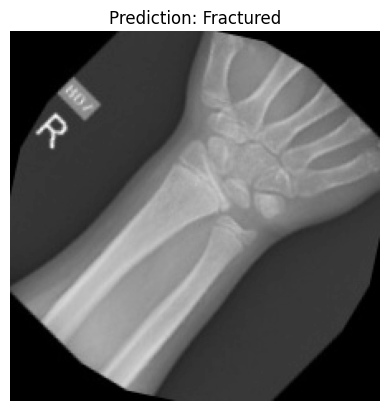

Predicted Class: Fractured (Confidence: 0.1567)


In [22]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk
from PIL import Image

# Load your trained model
model = load_model("bone_fracture_model.h5")  # Replace with your model filename if different

# Class names
class_names = ['Fractured', 'Non-Fractured']

def predict_uploaded_image():
    # Open file dialog to select image
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    root.destroy()

    if file_path:
        # Load and preprocess the image
        img = image.load_img(file_path, target_size=(224, 224), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

        # Predict
        prediction = model.predict(img_array)[0][0]
        predicted_class = class_names[int(prediction > 0.5)]

        # Show image and prediction
        plt.imshow(np.squeeze(img_array), cmap='gray')
        plt.title(f"Prediction: {predicted_class}")
        plt.axis("off")
        plt.show()

        print(f"Predicted Class: {predicted_class} (Confidence: {prediction:.4f})")
    else:
        print("No image selected.")

# Run manual testing
predict_uploaded_image()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


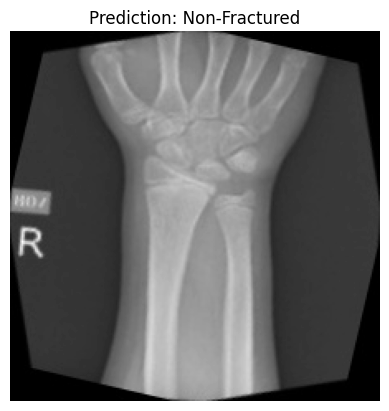

Predicted Class: Non-Fractured (Confidence: 0.9999)


In [23]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tkinter import filedialog
from tkinter import Tk
from PIL import Image

# Load your trained model
model = load_model("bone_fracture_model.h5")  # Replace with your model filename if different

# Class names
class_names = ['Fractured', 'Non-Fractured']

def predict_uploaded_image():
    # Open file dialog to select image
    root = Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg *.jpeg *.png")])
    root.destroy()

    if file_path:
        # Load and preprocess the image
        img = image.load_img(file_path, target_size=(224, 224), color_mode='grayscale')
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

        # Predict
        prediction = model.predict(img_array)[0][0]
        predicted_class = class_names[int(prediction > 0.5)]

        # Show image and prediction
        plt.imshow(np.squeeze(img_array), cmap='gray')
        plt.title(f"Prediction: {predicted_class}")
        plt.axis("off")
        plt.show()

        print(f"Predicted Class: {predicted_class} (Confidence: {prediction:.4f})")
    else:
        print("No image selected.")

# Run manual testing
predict_uploaded_image()


## Train Resnet50

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

In [41]:

# Set parameters
img_size = (224, 224)
batch_size = 32
train_dir = "C:/Users/parth/Desktop/Bone classification/data/train"
val_dir = "C:/Users/parth/Desktop/Bone classification/data/val"

In [42]:
# ✅ Load grayscale datasets (1-channel)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",  # 👈 You can keep grayscale
    label_mode="binary"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="grayscale",  # 👈 You can keep grayscale
    label_mode="binary"
)


Found 8863 files belonging to 2 classes.
Found 600 files belonging to 2 classes.


In [43]:
class_names = train_ds.class_names
print("Class Names:", class_names)

Class Names: ['fractured', 'not fractured']


In [44]:
# ✅ Convert grayscale to RGB and preprocess
def convert_grayscale_to_rgb_and_preprocess(images, labels):
    images = tf.image.grayscale_to_rgb(images)  # (H, W, 1) ➜ (H, W, 3)
    images = preprocess_input(images)
    return images, labels

train_ds = train_ds.map(convert_grayscale_to_rgb_and_preprocess).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(convert_grayscale_to_rgb_and_preprocess).prefetch(tf.data.AUTOTUNE)

In [45]:
# ✅ Load base ResNet50 model
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers


In [46]:
# ✅ Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Binary classification
])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [47]:
# ✅ Compile
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [48]:
# ✅ Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 681s 2s/step - accuracy: 0.7517 - loss: 0.5013 - val_accuracy: 0.5917 - val_loss: 0.8195
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 775s 3s/step - accuracy: 0.9101 - loss: 0.2264 - val_accuracy: 0.6050 - val_loss: 0.8243
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 704s 2s/step - accuracy: 0.9428 - loss: 0.1503 - val_accuracy: 0.6567 - val_loss: 0.7531
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 668s 2s/step - accuracy: 0.9656 - loss: 0.1040 - val_accuracy: 0.6317 - val_loss: 0.8216
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.9723 - loss: 0.0754 - val_accuracy: 0.5600 - val_loss: 1.1431
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 824s 3s/step - accuracy: 0.9799 - loss: 0.0598 - val_accuracy: 0.6117 - val_loss: 0.9531
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1286s 5s/step - accuracy: 0.9861 - loss: 0.0407 - val_accuracy: 0.5600 - val_loss: 1.2430
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 1211s 4s/step - accuracy: 0.9882 - loss: 0.0348 - val_ac

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Collect true labels and predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    preds = tf.squeeze(tf.round(preds))  # Convert probabilities to 0 or 1
    y_pred.extend(preds.numpy().astype(int))
    y_true.extend(labels.numpy().astype(int))

# Step 2: Generate classification report
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Fractured", "Non-Fractured"]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step

📊 Classification Report:
               precision    recall  f1-score   support

    Fractured       0.61      0.66      0.63       360
Non-Fractured       0.41      0.36      0.38       240

     accuracy                           0.54       600
    macro avg       0.51      0.51      0.51       600
 weighted

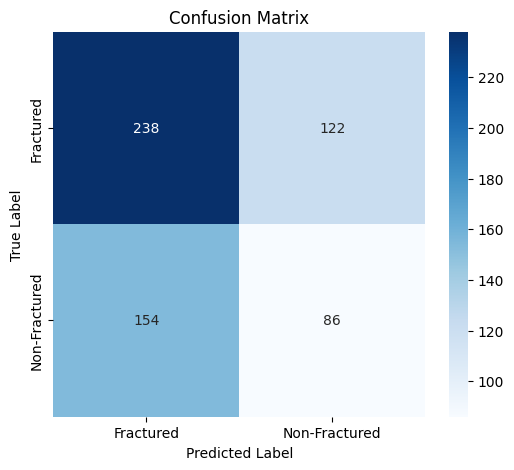

In [50]:
# Step 3: Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Fractured", "Non-Fractured"], yticklabels=["Fractured", "Non-Fractured"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

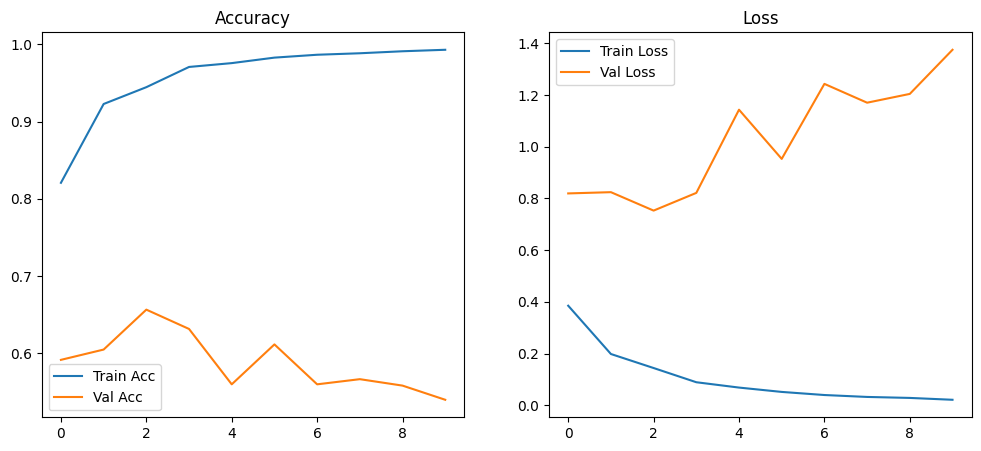

In [51]:

# ✅ Plot accuracy/loss
def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Acc")
    plt.plot(history.history["val_accuracy"], label="Val Acc")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Loss")
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
# ✅ Evaluate
loss, acc = model.evaluate(val_ds)
print(f"\n✅ Final Validation Accuracy: {acc*100:.2f}%")

 1/19 ━━━━━━━━━━━━━━━━━━━━ 1:08 4s/step - accuracy: 0.7188 - loss: 0.9175

In [ ]:
# ✅ Save model
model.save("resnet50_bone_fracture.h5")